## Почему Pytest
- Многоцелевой и функциональный
- Возможность писать и устанавливать плагины
- Можно использовать с тестами unittest/nose
- Простой в использовании **assert vs. self.assertEqual()**
- Отличная документация, комьюнити

## Минусы
• Является внешней зависимостью

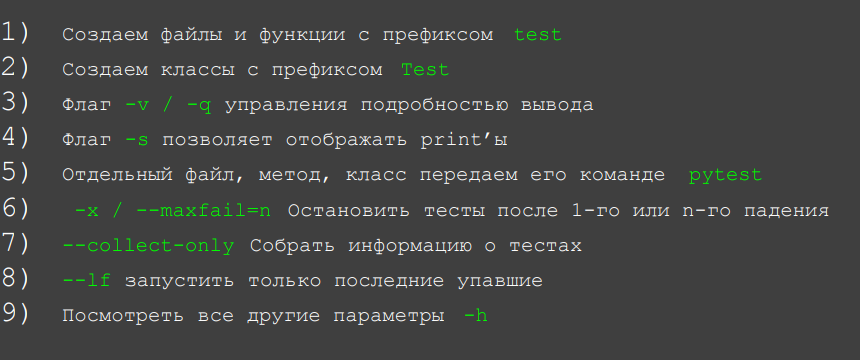

Создайте новый файл с именемtest_sample.py, содержащий функцию и тест:

// содержание test_sample.py
def func(x):
    return x + 1


def test_answer():
    assert func(3) == 5

In [ ]:
# Создание тестовых файлов
def test_one():
    print(" >>> I'm test one!")


# Так тоже можно, но не нужно и с модулем не заработает
def testwo():
    pass


# Создание тестовых классов
class TestClass:

    def test_one(self):
        pass

    def testtwo(self):
        pass

# Запуск отдельных файлов, функций, классов
# pytest 0_pytest_intro/
# pytest 0_pytest_intro/test_pytest_intro_1.py
# pytest 0_pytest_intro/test_pytest_intro_1.py::TestClass
# pytest 0_pytest_intro/test_pytest_intro_1.py::test_one


Используйте помощник raises, чтобы утверждать, что какой-то код вызывает исключение:

// содержание test_sysexit.py
import pytest


def f():
    raise SystemExit(1)


def test_mytest():
    with pytest.raises(SystemExit):
        f()

Сгруппируйте несколько тестов в классе
После разработки нескольких тестов вы можете сгруппировать их в класс. pytest позволяет легко создать класс, содержащий более одного теста:
// содержание test_class.py
класс TestClass:
    def test_one(self):
        x = "this"
        assert "h" in x

    def test_two(self):
        x = "hello"
        assert hasattr(x, "check")
pytest обнаруживает все тесты в соответствии с его соглашениями для обнаружения тестов Python, поэтому он находит обе test_префиксные функции. Нет необходимости что-либо подклассировать, но обязательно префиксите свой класс, Testиначе класс будет пропущен. Мы можем просто запустить модуль, передав его имя файла:

Группировка тестов в классах может быть полезна по следующим причинам:

Организация тестирования

Совместное использование приспособлений для тестов только в этом конкретном классе

Применение меток на уровне класса и их неявное применение ко всем тестам

При группировании тестов внутри классов следует помнить, что каждый тест имеет уникальный экземпляр класса. Если каждый тест будет использовать один и тот же экземпляр класса, это будет очень вредно для изоляции тестов и будет способствовать плохой практике тестирования. Это описано ниже

// содержание test_class_demo.py
класс TestClassDemoInstance:
    value = 0

    def test_one(self):
        self.value = 1
        assert self.value == 1

    def test_two(self):
        assert self.value == 1

## fixtures  (фикстуры)

• Начало работы с фикстурами

• Поиск фикстур тестами

• Scope и Autouse фикстур

• Объект request, передача фикстур в фикстуры

• Возвращение значений фикстурами

• Параметризация фикстур, тестов

• Структуры данных

Fixtures — это функции, выполняемые pytest до (а иногда и после) фактических тестовых функций. Код в фикстуре может делать все, что вам необходимо. Вы можете использовать Fixtures, чтобы получить набор данных для тестирования. Вы можете использовать Fixtures, чтобы получить систему в известном состоянии перед запуском теста. Fixtures также используются для получения данных для нескольких тестов.


Вот простой пример фикстуры, который возвращает число:

In [ ]:
    import pytest

    @pytest.fixture()
    def some_data():
        """Return answer to ultimate question."""
        return 42

    def test_some_data(some_data):
        """Use fixture return value in a test."""
        assert some_data == 42

PS C:\Users\home\PycharmProjects\pytest-tut\Fix> pytest -s      

In [ ]:
import pytest


@pytest.fixture
def first_fixture():
    print("\nPrint from 'first_fixture'")


def test_one(first_fixture):
    pass


def test_two(first_fixture):
    pass


class TestFunction:

    def test_from_test_class_one(self, first_fixture):
        pass

    def test_from_test_class_two(self, first_fixture):
        pass


Это распространенный сценарий. В моей гостевой статье Создание простого веб-приложения с помощью Bottle, SQLAlchemy и API Twitter я использовал небольшое приложение БД и pytest для тестирования. Я определил приспособление, чтобы сделать свежую базу данных с некоторыми тестовыми твитами для каждого теста:

In [ ]:
@pytest.fixture()
def db_setup(request):

    tweets = list(_gen_tweets())
    import_tweets(tweets)
    import_hashtags()

    def fin():
        truncate_tables()

    request.addfinalizer(fin)

   Декоратор @pytest.fixture() используется, чтобы сообщить pytest, что функция является фикстурой. Когда вы включаете имя фикстуры в список параметров тестовой функции, pytest знает, как запустить её перед запуском теста. Фикстуры могут выполнять работу, а могут возвращать данные в тестовую функцию.


Тест test_some_data() имеет в качестве параметра имя фикстуры some_data. pytest определит это и найдет фикстуру с таким названием. Наименование значимо в pytest. pytest будет искать в модуле теста фикстуру с таким именем. Он также будет искать в файле conftest.py, если не найдет его в этом.


Прежде чем мы начнем наше исследование фикстур (и файла conftest.py), мне нужно рассмотреть тот факт, что термин fixture имеет много значений в сообществе программирования и тестирования и даже в сообществе Python. Я использую fixture, fixture function, и fixture method взаимозаменяемо, чтобы ссылаться на функции @pytest.fixture(), описанные в этой главе. Фикстура также может использоваться для обозначения ресурса, который ссылается функцией фикстуры. Функции Fixture часто настраивают или извлекают некоторые данные, с которыми может работать тест. Иногда эти данные считаются фикстурой. Например, сообщество Django часто использует фикстуру для обозначения некоторых исходных данных, которые загружаются в базу данных в начале приложения.


Независимо от других смысловых значений, в pytest  test fixtures относятся к механизму, который обеспечивает pytest, чтобы отделить код “подготовка к (getting ready for)” и “очистка после (cleaning up after)” от ваших тестовых функций.

pytest fixtures — одна из уникальных фишек, которые поднимают pytest над другими тестовыми средами, и являются причиной того, почему многие уважаемые люди переключаются на… и остаются с pytest. Тем не менее, фикстуры в pytest отличаются от фикстур в Django и отличаются от процедур setup и teardown, обнаруженных в unittest и nose. Есть много особенностей и нюансов если говорить о фикстурах. Как только вы получите хорошую ментальную модель того, как они работают, вам станет полегче. Тем не менее, вам нужно поиграться с ними некоторое время, чтобы въехать, поэтому давайте начнем.

## Обмен Fixtures через conftest.py

Можно поместить фикстуры в отдельные тестовые файлы, но для совместного использования фикстур в нескольких тестовых файлах лучше использовать файл conftest.py где-то в общем месте, централизованно для всех тестов. Для проекта задач все фикстуры будут находиться в tasks_proj/tests/conftest.py.

Взятые оттуда, fixtures могут быть использованы любым тестом. Вы можете поместить fixtures в отдельные тестовые файлы, если вы хотите, чтобы fixture использовался только в тестах этого файле. Аналогично, вы можете иметь другие файлы conftest.py в подкаталогах каталога top tests. Если вы это сделаете, fixtures, определенные в этих низкоуровневых файлах conftest.py, будут доступны для тестов в этом каталоге и подкаталогах. Однако до сих пор fixtures в проекте «Задачи» были предназначены для любого теста. Поэтому использование всех наших инструментов в файле conftest.py в корне тестирования, tasks_proj/tests, имеет наибольший смысл.


Хотя conftest.py является модулем Python, он не должен импортироваться тестовыми файлами. Не импортируйте conftest ни когда! Файл conftest.py считывается pytest и считается локальным плагином, что станет понятно, когда мы начнем говорить о плагинах в главе 5 «Плагины» на стр. 95. Пока что считайте tests/conftest.py как место где мы можем поместить fixtures, для использования всеми тестами в каталоге тестов. Затем давайте переработаем некоторые наши тесты для task_proj, чтобы правильно использовать фикстуры.

## Спецификация областей(Scope) Fixture

Фикстуры включают в себя необязательный параметр под названием scope, который определяет, как часто фикстура получает setup и teardown. Параметр scope для @pytest.fixture() может иметь значения функции, класса, модуля или сессии. Scope по умолчанию — это функция. Настройки tasks_db и все фикстуры пока не определяют область. Таким образом, они являются функциональными фикстурами.


Ниже приведено краткое описание каждого значения Scope:


 - scope='function'


Выполняется один раз для каждой функции теста. Часть setup запускается перед каждым тестом с помощью fixture. Часть teardown запускается после каждого теста с использованием fixture. Это область используемая по умолчанию, если параметр scope не указан.


- scope='class'


Выполняется один раз для каждого тестового класса, независимо от количества тестовых методов в классе.


- scope='module'


Выполняется один раз для каждого модуля, независимо от того, сколько тестовых функций или методов или других фикстур при использовании модуля.


- scope='session'


Выполняется один раз за сеанс. Все методы и функции тестирования, использующие фикстуру области сеанса, используют один вызов setup и teardown.




    import pytest

    @pytest.fixture()
    def some_data():
        """Return answer to ultimate question."""
        return 42

    def test_some_data(some_data):
        """Use fixture return value in a test."""
        assert some_data == 42

Домашнее задание .
1. Написать не менее 3 базовых тестов на основные операции с базовыми типами данных 
(строки, числа, списки, словари, кортежи, множества) в Python, в качестве тестового фреймворка использовать pytest. 
2. В тестах необходимо использовать фикстурy
Примеры тестовых сценариев:
1. Создать произвольный список из 8 элементов, проверить что длина списка равна 8 элементам.
2. Сложить две строки, проверить что полученный результат соответствует ожидаемому.

In [ ]:
Дополнительный материал:
    https://habr.com/ru/post/448786/
    https://betterprogramming.pub/understand-5-scopes-of-pytest-fixtures-1b607b5c19ed
    https://pytest-docs-ru.readthedocs.io/ru/latest/fixture.html
    https://www.seleniumeasy.com/python/using-fixtures-in-pytest